In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('ad_spend.csv')
df.head()

,Ad Spend ($),Season,Revenue ($)
0,463,Monsoon,440
1,158,Winter,297
2,328,Monsoon,214
3,322,Monsoon,48
4,726,Winter,1048


In [5]:
df.columns

Index(['Ad Spend ($)', 'Season', 'Revenue ($)'], dtype='object')

In [8]:
g=df.groupby('Season')[['Ad Spend ($)','Revenue ($)']].mean()
g

,Ad Spend ($),Revenue ($)
Season,,
Monsoon,517.643836,423.150685
Summer,573.836066,689.360656
Winter,552.560606,826.530303


In [11]:
import matplotlib.pyplot as plt

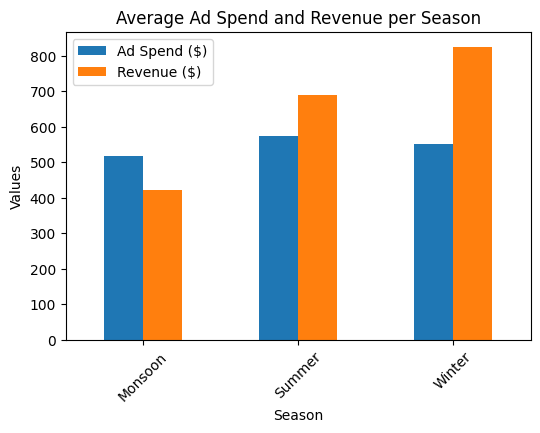

In [12]:
ax = g.plot(kind='bar', figsize=(6, 4))
ax.set_title('Average Ad Spend and Revenue per Season')
ax.set_xlabel('Season')
ax.set_ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

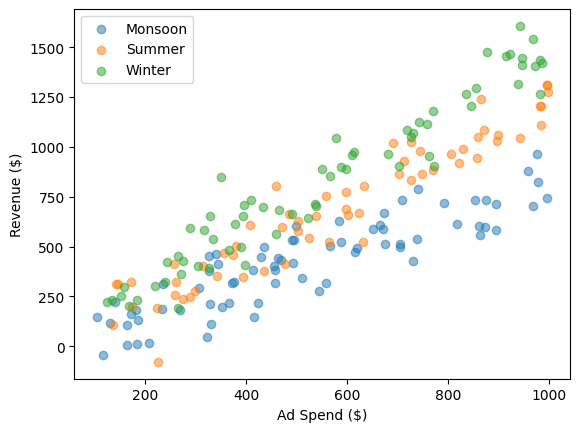

In [13]:
for season, subdf in df.groupby("Season"):
    plt.scatter(subdf["Ad Spend ($)"], subdf["Revenue ($)"], label=season, alpha=0.5)

plt.xlabel("Ad Spend ($)")    
plt.ylabel("Revenue ($)")
plt.legend()
plt.show()

In [15]:
df.head()

,Ad Spend ($),Season,Revenue ($)
0,463,Monsoon,440
1,158,Winter,297
2,328,Monsoon,214
3,322,Monsoon,48
4,726,Winter,1048


In [17]:
df_encoded=pd.get_dummies(df,columns=['Season'],drop_first=True)
df_encoded.head()

,Ad Spend ($),Revenue ($),Season_Summer,Season_Winter
0,463,440,False,False
1,158,297,False,True
2,328,214,False,False
3,322,48,False,False
4,726,1048,False,True


Train test split

In [19]:
from sklearn.model_selection import train_test_split

X = df_encoded[["Ad Spend ($)", "Season_Summer", "Season_Winter"]]
y = df_encoded["Revenue ($)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

Train a linear regression model

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.8882097000477289

Train a decission tree regressor

In [22]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8972778553142061

Train a gradient boosting Model

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9149899654766234

In [29]:
from sklearn.metrics import mean_squared_error
y_pred=model.predict(X_test)
mean_squared_error(y_test,y_pred)


14075.189625267236

In [31]:
df_eval=pd.DataFrame({'actual':y_test,'predicted':y_pred})
df_eval.head()

,actual,predicted
59,605,677.144222
5,1125,1073.575312
20,699,626.698237
198,504,418.202801
52,1310,1134.088133


In [36]:
df_eval['diff']=abs(df_eval['predicted']-df_eval['actual'])*100/df_eval['actual']

In [38]:
df_eval.head()

,actual,predicted,diff
59,605,677.144222,11.924665
5,1125,1073.575312,4.571083
20,699,626.698237,10.343600
198,504,418.202801,17.023254
52,1310,1134.088133,13.428387
